In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import html
%matplotlib inline
from sklearn import linear_model
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
train_path ='https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'
test_path = 'https://raw.githubusercontent.com/gurkpet/Thinkful-Lessons/8b1bfca035fc0505813326ee7ceb370d514e1884/Thinkful%202.5.1%20-%20Test%20Statistics/Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.txt'
train_data = pd.read_csv(train_path, skiprows=4, skipfooter=3, engine='python', thousands=",")
test_data = pd.DataFrame()
test_data = pd.read_table(test_path, skiprows=0, skipfooter=7, engine='python', thousands=",")

test_data.drop(test_data.columns[len(test_data.columns)-1], axis=1, inplace=True)

In [3]:
train_data = train_data.drop('Rape\n(revised\ndefinition)1', 1)
test_data = test_data.drop('Rape\n(revised\ndefinition)1', 1)

In [4]:
train_data = train_data.fillna(train_data.median(), inplace = True)
test_data = test_data.fillna(test_data.median(), inplace = True)

In [5]:
column_heads= ['City',
               'Population',
              'Violent_Crime',
               'Murder',
               'Rape',
               'Robbery',
               'Aggravated_Assult',
               'Property_Crime',
               'Burglary',
               'Larceny_Theft',
               'Motor_Vehicle_Theft',
               'Arson'
              ]

In [6]:
train_data.columns = [column_heads]
test_data.columns = [column_heads]

In [7]:
(test_data.isnull().sum()/len(test_data))*100

City                   0.0
Population             0.0
Violent_Crime          0.0
Murder                 0.0
Rape                   0.0
Robbery                0.0
Aggravated_Assult      0.0
Property_Crime         0.0
Burglary               0.0
Larceny_Theft          0.0
Motor_Vehicle_Theft    0.0
Arson                  0.0
dtype: float64

In [8]:
(train_data.isnull().sum()/len(train_data))*100

City                   0.0
Population             0.0
Violent_Crime          0.0
Murder                 0.0
Rape                   0.0
Robbery                0.0
Aggravated_Assult      0.0
Property_Crime         0.0
Burglary               0.0
Larceny_Theft          0.0
Motor_Vehicle_Theft    0.0
Arson                  0.0
dtype: float64

In [9]:
test_data['City'] = test_data.City.str.strip('5 4,')
test_data = test_data.dropna()

In [10]:
train_data.Population.nlargest(5)

216    8396126
35      258789
272     210562
346     199134
310     143834
Name: Population, dtype: int64

In [11]:
train_data = train_data.drop(train_data[train_data.Population >= 143834].index)
test_data = test_data.drop(test_data[test_data.Population >= 143834].index)

In [12]:
train_data.Population.nlargest(5)

7      118296
3       97956
126     96667
267     87204
57      80705
Name: Population, dtype: int64

In [13]:
test_data.Population.nlargest(5)

9      118860
4       98595
130     97144
279     88881
62      81435
Name: Population, dtype: int64

In [14]:
column_heads

['City',
 'Population',
 'Violent_Crime',
 'Murder',
 'Rape',
 'Robbery',
 'Aggravated_Assult',
 'Property_Crime',
 'Burglary',
 'Larceny_Theft',
 'Motor_Vehicle_Theft',
 'Arson']

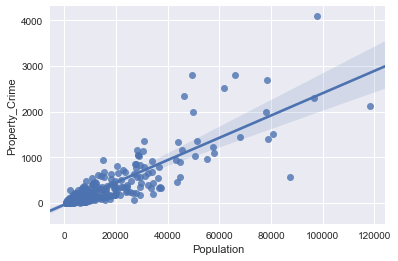

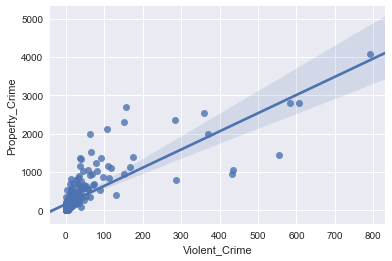

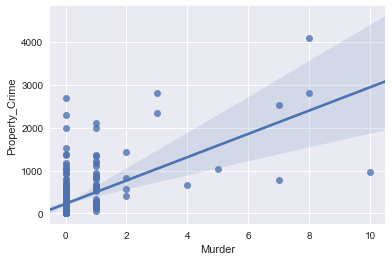

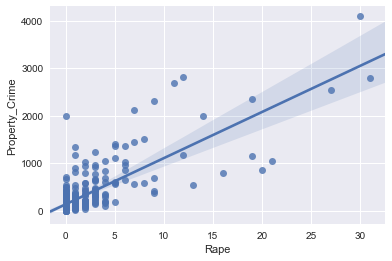

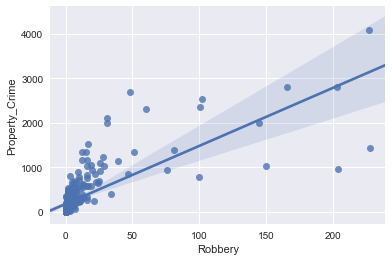

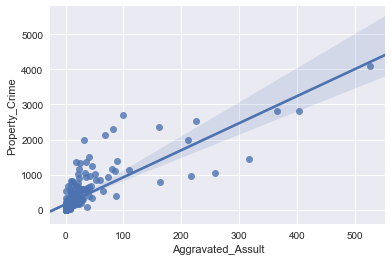

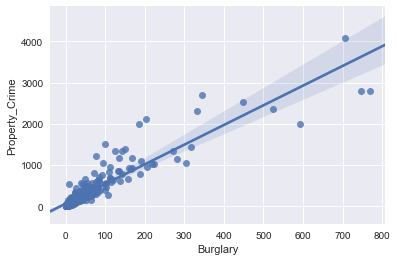

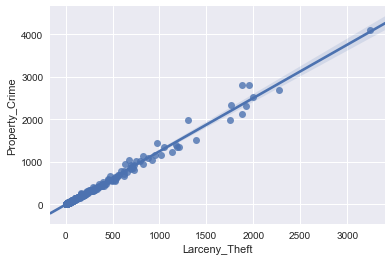

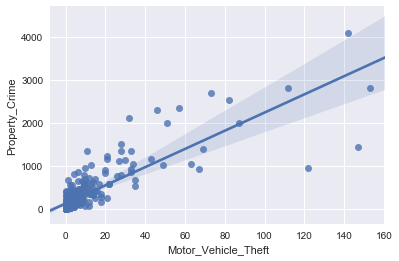

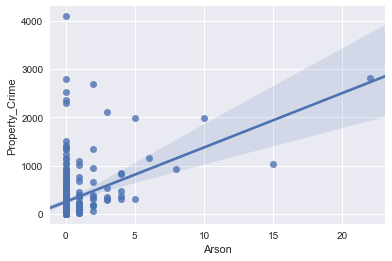

In [15]:
sns.regplot(train_data['Population'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Violent_Crime'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Murder'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Rape'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Robbery'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Aggravated_Assult'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Burglary'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Larceny_Theft'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Motor_Vehicle_Theft'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Arson'], train_data['Property_Crime'])
plt.show()

In [22]:
X = train_data[['Population', 'Burglary', 'Motor_Vehicle_Theft']]
Y = train_data[['Property_Crime']].values.reshape(-1, 1)
X_test = test_data[['Population', 'Burglary', 'Motor_Vehicle_Theft']]
Y_test = test_data[['Property_Crime']].values.reshape(-1, 1)

In [18]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.01161721  3.45452773 -0.95907944]]

Intercept: 
 [-21.93270434]

R-squared:
0.927491759874


In [24]:
predict = regr.predict(X_test)

In [31]:
Y_test.shape

(364, 1)

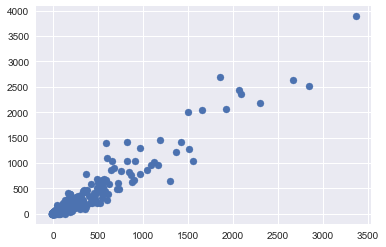

In [34]:
plt.scatter(predict, Y_test)
plt.show()